In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## Read the Dataset
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

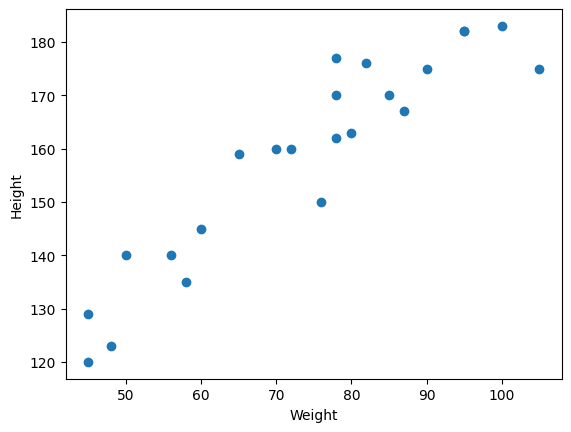

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
## Divide our dataset into dependent and Independent variable

X=df['Weight']
y=df['Height']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [15]:
y_train.dtype

dtype('int64')

In [8]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [13]:
X_test

15    78
9     78
0     45
8     95
17    65
Name: Weight, dtype: int64

In [16]:
## Standardize the Dataset
from sklearn.preprocessing import StandardScaler
# Ensure X_train and X_test are DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

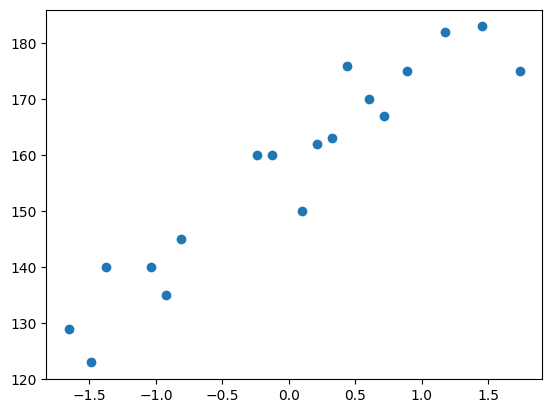

In [18]:
plt.scatter(X_train,y_train)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor=LinearRegression()

In [21]:
type(X_train)

numpy.ndarray

In [22]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [23]:
type(X_train)

numpy.ndarray

In [24]:
y_train.shape

(18,)

In [25]:
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
## Coefficients and Intercepts

print("Coefficient : " , regressor.coef_)
print("Intercept : ", regressor.intercept_)

Coefficient :  [17.03440872]
Intercept :  157.5


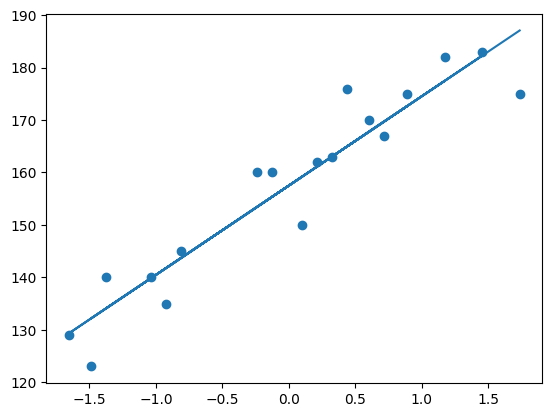

In [27]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train))

### prediction of train data
1. predicted height output= intercept +coef_(Weights)

          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)


In [29]:
y_pred_test=regressor.predict(X_test)

In [30]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

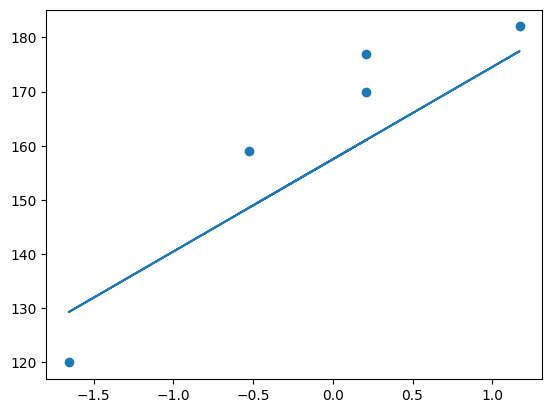

In [31]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [32]:
## Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error


In [33]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=root_mean_squared_error(y_test,y_pred_test)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [35]:
print(score)

0.776986986042344


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [36]:
# Display adjusted R-Squared

1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

## Using OLS

In [38]:
import statsmodels.api as sm

In [39]:
model=sm.OLS(y_train,X_train).fit()
predictions=model.predict(X_test)

In [40]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Thu, 22 Aug 2024   Prob (F-statistic):                       0.661
Time:                        10:13:33   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\WorkSpaces\AFTER COLLEGE\MLDL\Krish Naik Course ML\ML WorkSpace\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
